In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('/Applications/Data Analysis Bootcamp/Bootcamp-Project 3/US-Birth-Analysis/Data/us_births_2016_2021.csv')


df.head()

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5496 entries, 0 to 5495
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          5496 non-null   object 
 1   State Abbreviation             5496 non-null   object 
 2   Year                           5496 non-null   int64  
 3   Gender                         5496 non-null   object 
 4   Education Level of Mother      5496 non-null   object 
 5   Education Level Code           5496 non-null   int64  
 6   Number of Births               5496 non-null   int64  
 7   Average Age of Mother (years)  5496 non-null   float64
 8   Average Birth Weight (g)       5496 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 386.6+ KB


In [5]:
# Summary statistics for 'Average Age of Mother (years)' and 'Average Birth Weight (g)'
df[['Average Age of Mother (years)','Average Birth Weight (g)']].describe()

,Average Age of Mother (years),Average Birth Weight (g)
count,5496.000000,5496.000000
mean,29.552274,3250.887627
std,2.779735,114.456090
min,23.100000,2451.900000
25%,27.500000,3182.200000
50%,29.600000,3256.000000
75%,31.800000,3330.825000
max,35.500000,3585.700000


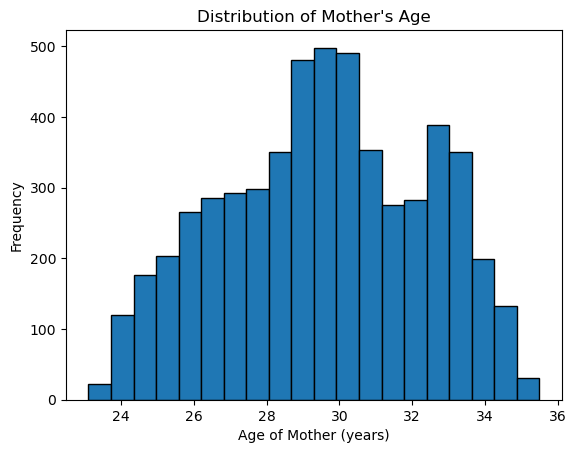

In [6]:
# Plot the distribution of mother's age
plt.hist(df['Average Age of Mother (years)'], bins=20, edgecolor='black')
plt.title('Distribution of Mother\'s Age')
plt.xlabel('Age of Mother (years)')
plt.ylabel('Frequency')
plt.show()

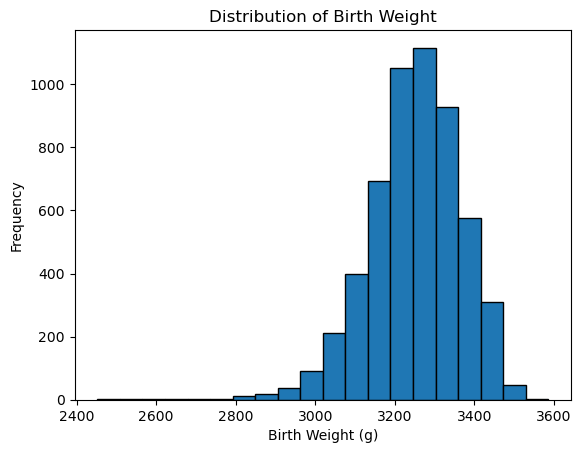

In [7]:
# Plot the distribution of birth weight
plt.hist(df['Average Birth Weight (g)'], bins=20, edgecolor='black')
plt.title('Distribution of Birth Weight')
plt.xlabel('Birth Weight (g)')
plt.ylabel('Frequency')
plt.show()

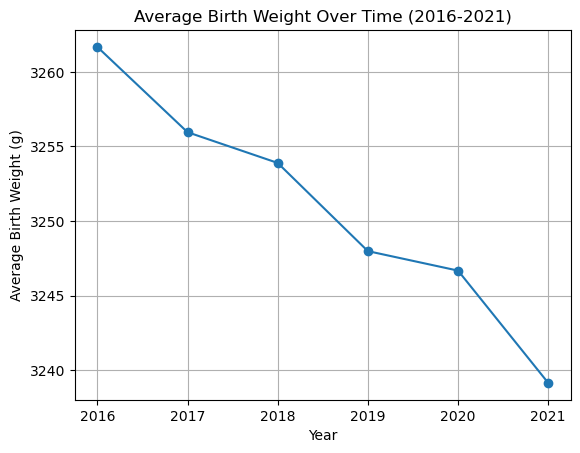

In [8]:
# Group by Year and calculate the average birth weight for each year
avg_birth_weight_by_year = df.groupby('Year')['Average Birth Weight (g)'].mean()

# Plot the trend over time
plt.plot(avg_birth_weight_by_year.index, avg_birth_weight_by_year.values, marker='o')
plt.title('Average Birth Weight Over Time (2016-2021)')
plt.xlabel('Year')
plt.ylabel('Average Birth Weight (g)')
plt.grid(True)
plt.show()

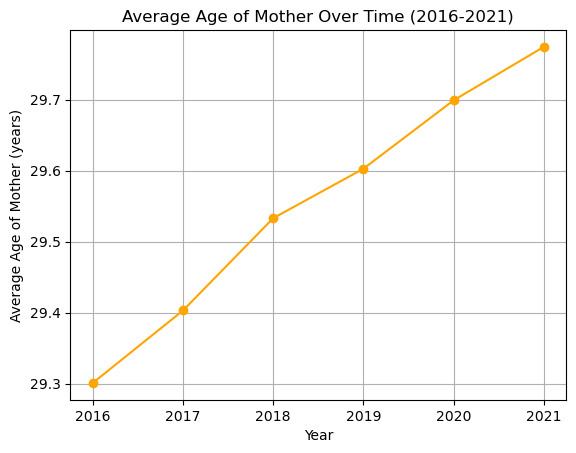

In [9]:
# Group by Year and calculate the average mother's age for each year
avg_age_by_year = df.groupby('Year')['Average Age of Mother (years)'].mean()

# Plot the trend over time
plt.plot(avg_age_by_year.index, avg_age_by_year.values, marker='o', color='orange')
plt.title('Average Age of Mother Over Time (2016-2021)')
plt.xlabel('Year')
plt.ylabel('Average Age of Mother (years)')
plt.grid(True)
plt.show()

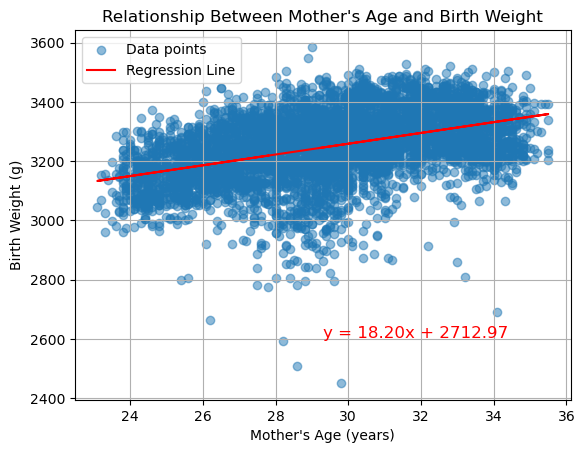

In [18]:
# Scatter plot of mother's age vs. birth weight
plt.scatter(df['Average Age of Mother (years)'], df['Average Birth Weight (g)'], alpha=0.5, label='Data points')

# Calculate the line of best fit
x = df['Average Age of Mother (years)']
y = df['Average Birth Weight (g)']

# Use numpy to get the slope and intercept of the regression line
slope, intercept = np.polyfit(x, y, 1)

# Plot the regression line
plt.plot(x, slope * x + intercept, color='red', label='Regression Line')
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.5, 0.2, equation, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', color='red')

# Add labels and title
plt.title('Relationship Between Mother\'s Age and Birth Weight')
plt.xlabel('Mother\'s Age (years)')
plt.ylabel('Birth Weight (g)')
plt.grid(True)

# Add a legend to distinguish data points and regression line
plt.legend()

# Show the plot
plt.show()